# Lista de Exercícios 2

* 01) Lista de Exercícios da CPE723 Edição Presencial - Exercício 1. No item 1(b), onde está escrito "três números aleatórios equiprováveis", leia-se "três números aleatórios, sorteados de PDF uniforme entre 0 e 1". 

* 02) Lista de Exercícios da CPE723 Edição Presencial - Exercício 2.

* 03) Lista de Exercícios da CPE723 Edição Presencial - Exercício 3.

* 04) Prova de 2009 - Questão 2, itens (a) e (c) (resolvida em aula no dia 12/04/2022).

* 05) Prova de 2011 - Questão 2, itens (a), (b), e (e).

* 06) (Opcional/Desafio) Prova de 2012 - Questão 3.

* 07) Prova de 2016 - Questão 2.

* 08) Prova de 2016 - Questão 3.

* 09) Prova de 2017 - Questão 3, itens (b) e (c).

* 10) Prova de 2018 - Questão 3.

# 01) Lista de Exercícios da CPE723 Edição Presencial - Exercício 1. No item 1(b), onde está escrito "três números aleatórios equiprováveis", leia-se "três números aleatórios, sorteados de PDF uniforme entre 0 e 1".

## a)

Nesse caso, $X(n)$ será dado por:

$$p(X(n)) = p_0M^n$$

In [1]:
import numpy as np

M = np.array([[0.5, 0.25, 0.25],[0.25, 0.5, 0.25],[0.25, 0.25, 0.5]])
p0 = np.array([0.3, 0.4, 0.3]).reshape(1, 3)

pX3 = np.matmul(p0, np.linalg.matrix_power(M, 3))

print("Distribuição p3: ", pX3)

Distribuição p3:  [[0.3328125 0.334375  0.3328125]]


## b)



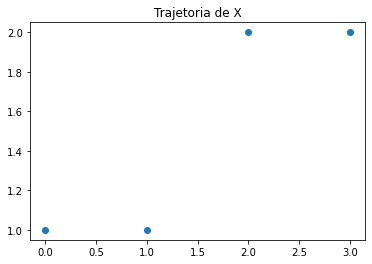

In [2]:
import matplotlib.pyplot as plt 

X = [1]
rs = []

for i in range(0, 3):
    r = np.random.uniform(0, 1)
    rs.append(r)
    for j in range(0, 3):
        if r <= M[j, X[i]]:
            X.append(j)
            break
        else:
            r -= M[j, X[i]]
 
plt.scatter(range(0, 4), X)
plt.title("Trajetoria de X")
plt.show()

## c)

In [3]:
import matplotlib.pyplot as plt 
import random

Xs = []

for k in range(0, 100):
    X = [random.randint(0, 2)]

    for i in range(0, 3):
        r = np.random.uniform(0, 1)
        for j in range(0, 3):
            if r <= M[j, X[i]]:
                X.append(j)
                break
            else:
                r -= M[j, X[i]]
    
    Xs.append(X)
    
Xs = np.array(Xs)

## d)

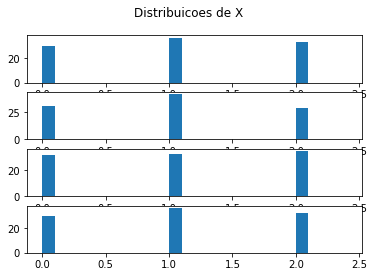

In [4]:
ps = []

for i in range(0, 4):
    cs = []
    for j in range(0, 3):
        cs.append(np.sum(Xs[:, i] == j)/100)

    ps.append(cs)

ps = np.array(ps)

fig, axs = plt.subplots(4)
fig.suptitle('Distribuicoes de X')
for i in range(0,4):
    axs[i].hist(Xs[:, i], bins=np.arange(0, 2.5, 0.1))

plt.show()

# 02) Lista de Exercícios da CPE723 Edição Presencial - Exercício 2.


## a)
Adotando um algorítmo de Metropolis que sorteia um estado para transição dentre todos os possíveis,  com changes iguais (1/5), temos:

In [5]:
Jx = [0.5, 0.2, 0.3, 0.1, 0.4]

In [6]:
import numpy as np

M = []
T = 0.1

for i in range(0, 5):
    m = []
    for j in range(0, 5):
        if i == j:
            m.append(0)
        else:
            if (Jx[i] - Jx[j]) < 0:
                m.append(1/5)
            else:
                m.append(np.exp(-(Jx[i] - Jx[j])/T)*1/5)

    M.append(m)
    
M = np.array(M)

for i in range(0,5):
    M[i, i] = 1- np.sum(M[np.arange(0, 5) != i, i])
    
print("Matriz de transição M: ")
print(M)

Matriz de transição M: 
[[0.2        0.00995741 0.02706706 0.00366313 0.07357589]
 [0.2        0.68939964 0.2        0.07357589 0.2       ]
 [0.2        0.07357589 0.49935706 0.02706706 0.2       ]
 [0.2        0.2        0.2        0.88573651 0.2       ]
 [0.2        0.02706706 0.07357589 0.00995741 0.32642411]]


## b) 

In [7]:
import math

# Metropolis
X = [random.randint(0, 4)]
T = 0.1

for n in range(1, 4):
    
    xhat = random.randint(0, 4)
        
    dJ = Jx[xhat] - Jx[X[n-1]]
    q = math.exp(-dJ/(T))
    r = random.uniform(0, 1)
    
    if r < q:
        X.append(xhat)
    else:
        X.append(X[n-1])

X = np.array(X)

print("Sequência de estados: ")
print(X+1)

Sequência de estados: 
[3 3 2 4]


## c)

## d)

In [8]:
T = 0.1

for i in range(0,5):
    print("Fator x =", i+1,":", np.exp(-Jx[i]/T))

Fator x = 1 : 0.006737946999085467
Fator x = 2 : 0.1353352832366127
Fator x = 3 : 0.049787068367863965
Fator x = 4 : 0.36787944117144233
Fator x = 5 : 0.01831563888873418


## e)

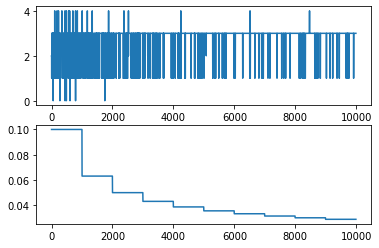

In [9]:
import math

# SA
X = []
x = random.randint(0, 4)
xhat = 0
Ts = [0.1, 0.0631, 0.05, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289]
Tlista = []
Xs = np.zeros((5, len(Ts)))
N = 1000

for k in range(0, len(Ts)):
    T = Ts[k]
    for n in range(1, N):

        xhat = random.randint(0, 4)

        dJ = Jx[xhat] - Jx[x]
        q = math.exp(-dJ/(T))
        r = random.uniform(0, 1)

        if r < q:
            x = xhat

        X.append(x)
        Tlista.append(T)
        Xs[x, k] += 1
        

X = np.array(X)

fig, axs = plt.subplots(2)
axs[0].plot(X)
axs[1].plot(Tlista)
plt.show()

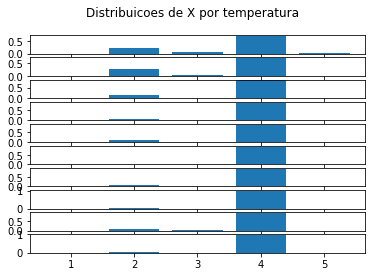

In [10]:
fig, axs = plt.subplots(len(Ts))
fig.suptitle('Distribuicoes de X por temperatura')
for i in range(0,len(Ts)):
    axs[i].bar(range(1, 6), Xs[:, i]/np.sum(Xs[:, i]))

plt.show()

Como esperado, conforme a temperatura diminui, maior é a tendência do estado permanecer como sendo o de menor energia (x = 4).

# 03) Lista de Exercícios da CPE723 Edição Presencial - Exercício 3.

<ipython-input-11-f01bab6b216f>:59: RuntimeWarning: overflow encountered in exp
  q = np.exp((Jatual-Jit)/T)


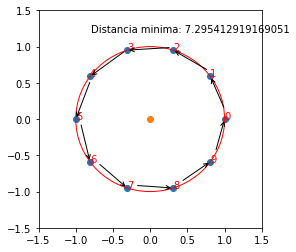

In [11]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Ordem de caminhos inicial aleatoria
ordem = np.arange(10)
np.random.shuffle(ordem[1:])
ordemHat = ordem


# Pentagono com as posicoes de cada cidade
x = []
raio = 1
for i in range(0, 10):
    x.append([raio*np.cos(i*2*np.pi/10), raio*np.sin(i*2*np.pi/10)])

x = np.array(x)

N = 1e4
ordemMin = ordem
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0

T0 = 1e-2
T = T0
Ts = []
Kmax = 20
distancias = []
k = 1

# O custo é a distancia total percurrida
def J(ordem):
    distTot = 0
    iAnterior = 0
    for i in ordem[1:]:
        dist = np.linalg.norm(x[i]-x[iAnterior])
        iAnterior = i
        distTot += dist
        
    dist = np.linalg.norm(x[i]-x[0])
    distTot += dist
    return distTot


# Simulated Annealing
while k < Kmax:
    n += 1
    
    # Troca duas cidades de ordem de maneira aleatoria, exceto a primeira que é sempre a mesma
    idx = random.randint(1, 9)
    idx2 = random.randint(1, 9) 
    ordemHat[idx], ordemHat[idx2] = ordem[idx2], ordem[idx]
            
    Jit = J(ordemHat)
    
    q = np.exp((Jatual-Jit)/T)
    r = random.uniform(0, 1)
    
    if r < q:
        ordem = ordemHat
        Jatual = Jit
        
    
    if Jit < Jmin:
        Jmin = Jit
        ordemMin = ordemHat   
             
    if n % N == 0:
        k += 1
#         print(k/Kmax*100)
        T = T0/(np.log2(1 + k))

    distancias.append(Jit)

# Visualização do resultado final
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[:,0], x[:,1])
ax.scatter(0, 0)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])


for i in ordemMin[1:]:
    plt.annotate(text=str(i-1), xy=(x[i]), xytext=(x[i-1]), color='r', arrowprops=dict(arrowstyle='->'))

plt.annotate(text=str(9), xy=(x[0]), xytext=(x[9]), color='r', arrowprops=dict(arrowstyle='->'))
plt.annotate(text="Distancia minima: " + str(Jmin), xy=(-0.8,1.2), xytext=(-0.8,1.2))

plt.show()

# 04) Prova de 2009 - Questão 2, itens (a) e (c) (resolvida em aula no dia 12/04/2022).

## a) 

In [23]:
Jx = [0.3, 0.1, 0.1, 0.2]

T = 0.1
bolt1 = []
bolt2 =[]

for i in range(0,4):
    bolt1.append(np.exp(-Jx[i]/T))
    print("Fator x =", i+1,": T = 0.1:", bolt1[i])
    
T = 1

for i in range(0,4):
    bolt2.append(np.exp(-Jx[i]/T))
    print("Fator x =", i+1,": T = 1.0:", bolt2[i])

Fator x = 1 : T = 0.1: 0.049787068367863965
Fator x = 2 : T = 0.1: 0.36787944117144233
Fator x = 3 : T = 0.1: 0.36787944117144233
Fator x = 4 : T = 0.1: 0.1353352832366127
Fator x = 1 : T = 1.0: 0.7408182206817179
Fator x = 2 : T = 1.0: 0.9048374180359595
Fator x = 3 : T = 1.0: 0.9048374180359595
Fator x = 4 : T = 1.0: 0.8187307530779818


# c)

Adotando um algorítmo de Metropolis que sorteia um estado acima ou abaixo do atual, temos:

In [69]:
import numpy as np
from numpy import linalg as LA

Jx = [0.3, 0.1, 0.1, 0.2]

# Restorna se x é uma unidade maior ou menor que y para um tamanho maximo t
# Se x = 0, seus vizinhos sao 1 e t
# Se x = t, seus viznhos sao t-1 e 0
# Caso contrario, seus vizinhos sao x-1 e x+1
def vizinhos(x, y, t):
    if x == 0:
        return y == 1 or y == t
    if x == t:
        return y == 0 or y == t-1
    
    return y == x+1 or y == x-1
    

#Calculo da matriz de transição
def geraMatriz(T):
    M = []
    for i in range(0, 4):
        m = []
        for j in range(0, 4):
            if vizinhos(i, j, 3):
                dJ = Jx[i] - Jx[j]
                
                if dJ < 0:
                    m.append(1/2)
                else:
                    m.append(np.exp(-(Jx[i] - Jx[j])/T)*1/2)
            else:
                m.append(0)
        M.append(m)
        
    M = np.array(M)
    
    for i in range(0,4):
        M[i, i] = 1- np.sum(M[np.arange(0, 4) != i, i])
    
    return M

#Primeira matriz de transição

M1 = geraMatriz(0.1)
    
print("Matriz de transição M(T=0.1): ")
print(M1)


#Segunda matriz de transição

M2 = geraMatriz(1)
    
print("Matriz de transição M(T=1): ")
print(M2)

#Vetores invariantes
w, v = LA.eig(M1)
pi1 = v[:, 0]

w, v = LA.eig(M2)
pi2 = v[:, 1]


print("\nVetor invariante para M(T=0.1): ")
print(pi1/np.sum(pi1))
print("\nFator de Boltzman (T=0.1): ")
print(bolt1/np.sum(bolt1))
print("\nVetor invariante para M(T=1): ")
print(pi2/np.sum(pi2))
print("\nFator de Boltzman (T=1.0): ")
print(bolt2/np.sum(bolt2))

Matriz de transição M(T=0.1): 
[[0.         0.06766764 0.         0.18393972]
 [0.5        0.43233236 0.5        0.        ]
 [0.         0.5        0.31606028 0.5       ]
 [0.5        0.         0.18393972 0.31606028]]
Matriz de transição M(T=1): 
[[0.         0.40936538 0.         0.45241871]
 [0.5        0.09063462 0.5        0.        ]
 [0.         0.5        0.04758129 0.5       ]
 [0.5        0.         0.45241871 0.04758129]]

Vetor invariante para M(T=0.1): 
[0.05406459 0.3994863  0.3994863  0.1469628 ]

Fator de Boltzman (T=0.1): 
[0.05406459 0.3994863  0.3994863  0.1469628 ]

Vetor invariante para M(T=1): 
[0.21987801 0.26855961 0.26855961 0.24300278]

Fator de Boltzman (T=1.0): 
[0.21987801 0.26855961 0.26855961 0.24300278]


# 05) Prova de 2011 - Questão 2, itens (a), (b), e (e).

## a)

In [95]:
Jx = [0.2, 0.3, 0.3, 0.1]
T = 0.5

#Possiveis transicoes em M1 (x1 alterado)
possiveisX1 = [[0,0,1,0],
                [0,0,0,1],
                [1,0,0,0],
                [0,1,0,0]]
#Possiveis transicoes em M2 (x2 alterado)
possiveisX2 = [[0,1,0,0],
                [1,0,0,0],
                [0,0,0,1],
                [0,0,1,0]]

possiveisX1 = np.array(possiveisX1, dtype=float)
possiveisX2 = np.array(possiveisX2, dtype=float)

def markov(p, T):
    for i in range(0, 4):
        boltz = 1/2
        for j in range(0, 4):
            if p[j, i] == 1:                
                if (Jx[j] - Jx[i]) > 0:
                    boltz = np.exp(-(Jx[j] - Jx[i])/T)*1/2
                    
                p[j, i] = boltz
                
        p[i, i] = 1 - boltz
    return p

M1 = markov(possiveisX1, T)
M2 = markov(possiveisX2, T)

print("Matriz de transição M1(x1 -> x1 novo): ")
print(M1)
print("\nMatriz de transição M2(x2 -> x2 novo): ")
print(M2)

Matriz de transição M1(x1 -> x1 novo): 
[[0.59063462 0.         0.5        0.        ]
 [0.         0.5        0.         0.33516002]
 [0.40936538 0.         0.5        0.        ]
 [0.         0.5        0.         0.66483998]]

Matriz de transição M2(x2 -> x2 novo): 
[[0.59063462 0.5        0.         0.        ]
 [0.40936538 0.5        0.         0.        ]
 [0.         0.         0.5        0.33516002]
 [0.         0.         0.5        0.66483998]]


# b)

In [96]:
Jx = [0.2, 0.3, 0.3, 0.1]
T = 0.5

#Fatores de boltzman
boltzman = []

for i in range(0,4):
    boltzman.append(np.exp(-Jx[i]/T))
    
#Vetores invariantes
w, v = LA.eig(M1)
pi1 = v[:, 0]


w, v = LA.eig(M2)
pi2 = v[:, 0]

print("\nVetor de fatores de boltzman: ")
print(np.around(boltzman/np.sum(boltzman), decimals=3))
print("\nVetor invariante para M1: ")
print(np.around(pi1/np.sum(pi1), decimals=3))
print("Vetor invariante para M2: ")
print(np.around(pi2/np.sum(pi2), decimals=3))
print("\nMedia dos vetores invariantes: ")
print(np.around(pi1/np.sum(pi1)/2, decimals=3) + np.around(pi2/np.sum(pi2)/2, decimals=3))


Vetor de fatores de boltzman: 
[0.259 0.212 0.212 0.317]

Vetor invariante para M1: 
[0.55 0.   0.45 0.  ]
Vetor invariante para M2: 
[0.55 0.45 0.   0.  ]

Media dos vetores invariantes: 
[0.55  0.225 0.225 0.   ]


## e)

Para um número suficientemente grande de iterações, as transições serão dadas pelo autovetor invariante de M1 e M2.

# 07) Prova de 2016 - Questão 2.

# a)

Observando a primera coluna da matriz M1, a probabilidade de uma transição 00 -> 10 é $e^{-(J(10) - J(00))}$. Logo:

$$p(10|00) = 1/3 = e^{-(J(10) - J(00))}$$
$$\ln(1/3) = \ln(e^{-(J(10) - J(00))})$$
$$\ln(1/3) = -J(10) + J(00)$$
$$\ln(1/3) = -J(10) + 1$$
$$J(10) =  1 - \ln(1/3)$$

Um processo análogo pode ser realizado para as demais funções custo:
    

In [113]:
J = np.zeros((2,2))
J[0,0] = 1

#M1 coluna 1
p1000 = np.log(1/3)
J[1,0] = J[0,0]-p1000

#M2 coluna 4
p1110 = np.log(1/3)
J[1,1] = J[1,0]-p1110

#M1 coluna 2
p1101 = np.log(1/3)
J[0,1] = J[1,1]+p1101

print("Matriz contendo os custos J[x1, x2]:")
print(J)

Matriz contendo os custos J[x1, x2]:
[[1.         2.09861229]
 [2.09861229 3.19722458]]


## b)

In [114]:
M1 = [[2/3, 0, 0, 1],
     [0, 2/3, 1, 0],
     [0, 1/3, 0, 0],
     [1/3, 0, 0, 0]]

M2 = [[2/3, 1, 0, 0],
     [1/3, 0, 0, 0],
     [0, 0, 0, 1/3],
     [0, 0, 1, 2/3]]

M1 = np.array(M1)
M2 = np.array(M2)

M = M1*1/2 + M2*1/2

print("Matriz M:")
print(M)

Matriz M:
[[0.66666667 0.5        0.         0.5       ]
 [0.16666667 0.33333333 0.5        0.        ]
 [0.         0.16666667 0.         0.16666667]
 [0.16666667 0.         0.5        0.33333333]]


## c)

In [115]:
w, v = LA.eig(M)
pi = v[:, 0]

print("Vetor invariante de M:")
print(pi/np.sum(pi))

boltz = []

for i in range(0, 2):
    for j in range(0, 2):
        boltz.append(J[i, j])

print("Fatores de Boltzman")
print(boltz/np.sum(boltz))

Vetor invariante de M:
[0.5625 0.1875 0.0625 0.1875]
Fatores de Boltzman
[0.11912634 0.25       0.25       0.38087366]


# 08) Prova de 2016 - Questão 3.

## a)

<ipython-input-6-8eb25bba9002>:39: RuntimeWarning: overflow encountered in exp
  q = np.exp((Jatual-Jit)/T)


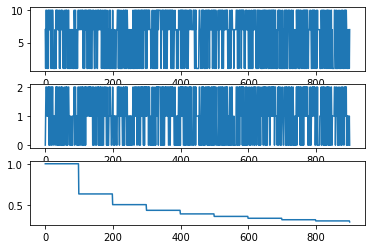

J minimo encontrado:  1
Estados minimos encontrados (X):  2


In [6]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

x = 0
xhat = 0
N = 100
xmin = x
Xs = []
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0

T0 = 1
T = T0
Ts = []
Kmax = 10
k = 1

# Simulated Annealing simples

def J(x):
    Jx = [7, 1, 10, 4]
    return Jx[x]

while k < Kmax:
    n += 1
    
    xhat = x + random.randint(-1, 1)
    if xhat > 3:
        xhat = 0
    elif xhat < 0:
        xhat = 3
        
    Jit = J(xhat)
    
    q = np.exp((Jatual-Jit)/T)
    r = random.uniform(0, 1)
    
    if r < q:
        x = xhat
        Jatual = Jit
        
    
    if Jit < Jmin:
        Jmin = Jit
        xmin = xhat   
             
    if n % N == 0:
        k += 1
#         print(k/Kmax*100)
        T = T0/(np.log2(1 + k))

    Js.append(Jit)
    Ts.append(T)
    Xs.append(xhat)

fig, axs = plt.subplots(3)
axs[0].plot(Js)
axs[1].plot(Xs)
axs[2].plot(Ts)
plt.show()
print("J minimo encontrado: ", Jmin)
print("Estados minimos encontrados (X): ", xmin+1)

## b)

In [11]:
import numpy as np
from numpy import linalg as LA

Jx = [7, 1, 10, 4]
tamanho = len(Jx)

# Restorna se x é uma unidade maior ou menor que y para um tamanho maximo t
# Se x = 0, seus vizinhos sao 1 e t
# Se x = t, seus viznhos sao t-1 e 0
# Caso contrario, seus vizinhos sao x-1 e x+1
def vizinhos(x, y, t):
    if x == 0:
        return y == 1 or y == t
    if x == t:
        return y == 0 or y == t-1
    
    return y == x+1 or y == x-1
    

#Calculo da matriz de transição
def geraMatriz(T):
    M = []
    for i in range(0, tamanho):
        m = []
        for j in range(0, tamanho):
            if vizinhos(i, j, tamanho-1):
                dJ = Jx[i] - Jx[j]
                
                if dJ < 0:
                    m.append(1/2)
                else:
                    m.append(np.exp(-(Jx[i] - Jx[j])/T)*1/2)
            else:
                m.append(0)
        M.append(m)
        
    M = np.array(M)
    
    for i in range(0,tamanho):
        M[i, i] = 1- np.sum(M[np.arange(0, tamanho) != i, i])
    
    return M

#Primeira matriz de transição

M1 = geraMatriz(10)
    
print("Matriz de transição M(T=10): ")
print(M1)


#Segunda matriz de transição

M2 = geraMatriz(5)
    
print("Matriz de transição M(T=5): ")
print(M2)

#Vetores invariantes
w, v = LA.eig(M1)
pi1 = v[:, 1]


w, v = LA.eig(M2)
pi2 = v[:, 2]


print("\nVetor invariante para M(T=10): ")
print(pi1/np.sum(pi1))
print("\nVetor invariante para M(T=5): ")
print(pi2/np.sum(pi2))

Matriz de transição M(T=10): 
[[0.         0.27440582 0.         0.37040911]
 [0.5        0.52230935 0.5        0.        ]
 [0.         0.20328483 0.         0.27440582]
 [0.5        0.         0.5        0.35518507]]
Matriz de transição M(T=5): 
[[0.         0.15059711 0.         0.27440582]
 [0.5        0.76675345 0.5        0.        ]
 [0.         0.08264944 0.         0.15059711]
 [0.5        0.         0.5        0.57499708]]

Vetor invariante para M(T=10): 
[0.20355008 0.37089243 0.15079361 0.27476387]

Vetor invariante para M(T=5): 
[0.14945343 0.49620287 0.08202178 0.27232191]


## c)

# 9) Prova de 2017 - Questão 3, itens (b) e (c).

## b) e c)

In [15]:
import numpy as np
from numpy import linalg as LA

Jx = [4, 1, 3, 2, 4]
tamanho = len(Jx)

# Restorna se x é uma unidade maior ou menor que y para um tamanho maximo t
# Se x = 0, seus vizinhos sao 1 e t
# Se x = t, seus viznhos sao t-1 e 0
# Caso contrario, seus vizinhos sao x-1 e x+1
def vizinhos(x, y, t):
    if x == 0:
        return y == 1 or y == t
    if x == t:
        return y == 0 or y == t-1
    
    return y == x+1 or y == x-1
    

#Calculo da matriz de transição
def geraMatriz(T):
    M = []
    for i in range(0, tamanho):
        m = []
        for j in range(0, tamanho):
            if vizinhos(i, j, tamanho-1):
                dJ = Jx[i] - Jx[j]
                
                if dJ < 0:
                    m.append(1/2)
                else:
                    m.append(np.exp(-(Jx[i] - Jx[j])/T)*1/2)
            else:
                m.append(0)
        M.append(m)
        
    M = np.array(M)
    
    for i in range(0,tamanho):
        M[i, i] = 1- np.sum(M[np.arange(0, tamanho) != i, i])
    
    return M

#Primeira matriz de transição

M1 = geraMatriz(1/np.log(2))
    
print("Matriz de transição M(T=10): ")
print(M1)


#Segunda matriz de transição

M2 = geraMatriz(1/np.log(3))
    
print("Matriz de transição M(T=5): ")
print(M2)

#Vetores invariantes
w, v = LA.eig(M1)
pi1 = v[:, 3]


w, v = LA.eig(M2)
pi2 = v[:, 3]


print("\nVetor invariante para M(T=10): ")
print(pi1/np.sum(pi1))
print("\nVetor invariante para M(T=5): ")
print(pi2/np.sum(pi2))

Matriz de transição M(T=10): 
[[0.     0.0625 0.     0.     0.5   ]
 [0.5    0.8125 0.5    0.     0.    ]
 [0.     0.125  0.     0.25   0.    ]
 [0.     0.     0.5    0.625  0.5   ]
 [0.5    0.     0.     0.125  0.    ]]
Matriz de transição M(T=5): 
[[0.         0.01851852 0.         0.         0.5       ]
 [0.5        0.92592593 0.5        0.         0.        ]
 [0.         0.05555556 0.         0.16666667 0.        ]
 [0.         0.         0.5        0.77777778 0.5       ]
 [0.5        0.         0.         0.05555556 0.        ]]

Vetor invariante para M(T=10): 
[0.0625 0.5    0.125  0.25   0.0625]

Vetor invariante para M(T=5): 
[0.02439024 0.65853659 0.07317073 0.2195122  0.02439024]


# 10) Prova de 2018 - Questão 3.

# a)

Seja x1 -> x2 uma transição do estado de índice x1 para o estado de índice x2. Observando a primera coluna da matriz M, a probabilidade de uma transição 1 -> 2 é $1/2e^{(-(J(2) - J(1)))/T}$. Logo:

$$p(2|1) = 1/2(e^{-2}) = 1/2e^{-(J(2) - J(1))}$$
$$e^{-2} = e^{-(J(2) - J(1))/T}$$
$$\ln(e^{-2}) = \ln(e^{-(J(2) - J(1))/T})$$
$$-2 = (-J(2) + J(1))/T$$
$$-2T = -J(2) + 0.2$$
$$J(2) =  0.4$$

Um processo análogo pode ser realizado para as demais funções custo:

In [34]:
M = [[1/2*(1-np.exp(-2)), 1/2, 0, 0, 1/2],
    [1/2*np.exp(-2), 0, 1/2*np.exp(-1), 0, 0],
    [0, 1/2, 1/2*(1 - np.exp(-1)), 1/2*np.exp(-2), 0],
    [0, 0, 1/2, 1/2*(2-np.exp(-1)-np.exp(-2)), 1/2],
    [1/2, 0, 0, 1/2*np.exp(-1), 0]]

J = np.zeros((5,1))
T = 0.1
J[0] = 0.2

#Coluna 1
p21 = np.exp(-2)
J[1] = J[0]-np.log(p21)*T

#Coluna 3
p23 = np.exp(-1)
J[2] = J[1] + np.log(p23)*T

#Coluna 4
p34 = np.exp(-2)
J[3] = J[2] + np.log(p34)*T

#Coluna 4
p54 = np.exp(-1)
J[4] = J[3] - np.log(p54)*T


print("Energias de cada estado: ")
print(J)

Energias de cada estado: 
[[0.2]
 [0.4]
 [0.3]
 [0.1]
 [0.2]]


## b)

In [36]:
#Vetores invariantes
w, v = LA.eig(M)
pi1 = v[:, 1]
print("\nVetor invariante para M(T=0.1): ")
print(pi1/np.sum(pi1))


Vetor invariante para M(T=0.1): 
[0.19151597 0.02591887 0.07045479 0.52059439 0.19151597]


## c)